In [1]:
from __future__ import print_function

import pylab as pl
import numpy as np
import seaborn
from scipy.optimize import curve_fit, minimize
    
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
# choosing which distribution to use
# distributions = ['pois', 'gaus', 'chisq', 'binomial', 'lnorm']

# and which mean to give:
np.random.seed(111)
mymean = 100
mySTD = 44
# creating 100 sample distributions
# mysize = (2000 / (np.array(range(1, 101)))).astype(int)
mysize = (np.random.rand(100) * 2000).astype(int)
print (mysize, mysize.shape)

[1224  338  872 1538  590  298   44  840  477  675 1981  475  162 1339 1242
  548  932  236  147 1801 1587 1681 1630 1981 1154 1627  842   54  908  210
 1634 1395 1130  548 1996  276 1230  970  810 1455  645  801  637 1894 1837
 1627   68 1886 1900 1613  962 1933  833  637   32   76  106  255   66  452
 1087  357  358  299 1366  938 1536 1337  882 1190  923 1926  295 1813  995
 1184 1369  354 1729  964  138  729  723  944  358  350 1898 1311  269 1855
 1683  105  407 1745 1347  594 1468 1236  420 1604] (100,)


In [3]:
# making a dictionary to host the distributions
# creates md as an empty dictionary
md = {}

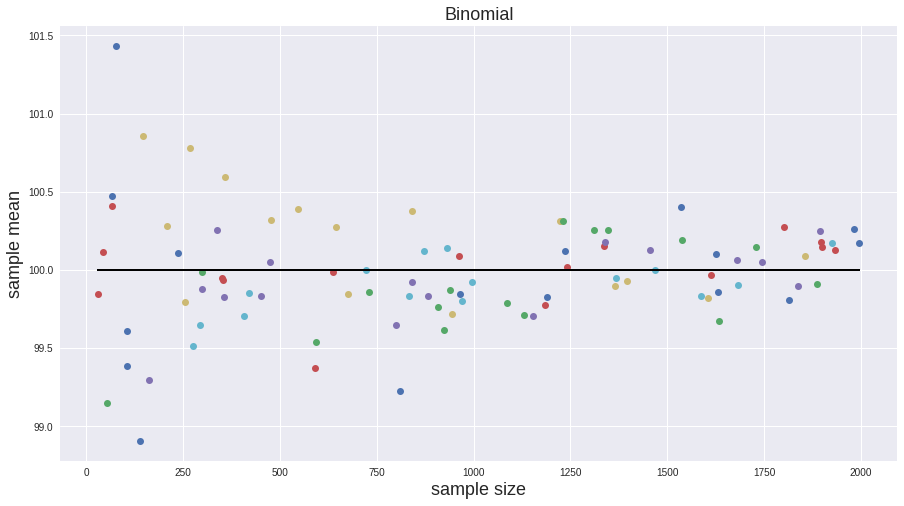

In [25]:
# binomial
k = mymean
p = 0.5
tr = 200
# p*n = mymean
np.random.seed(98)

md['binom'] = {} 
#Filling the dictionary
for n in mysize:
    md['binom'][n] = np.random.binomial(tr, p, size = n)

#Saving the means in my dictionary
md['binom']['means'] = {}

#Plotting the Means
axBinom_means = pl.figure(figsize=(15,8)).add_subplot(111)
for nn in md['binom']:
    if not type(nn) == str:
        md['binom']['means'][nn] = md['binom'][nn].mean()
        axBinom_means.plot(nn, md['binom']['means'][nn], 'o')
        axBinom_means.set_xlabel('sample size', fontsize=18)
        axBinom_means.set_ylabel('sample mean', fontsize=18)
        axBinom_means.set_title('Binomial', fontsize=18)
        axBinom_means.plot([min(mysize), max(mysize)], [mymean, mymean], 'k')

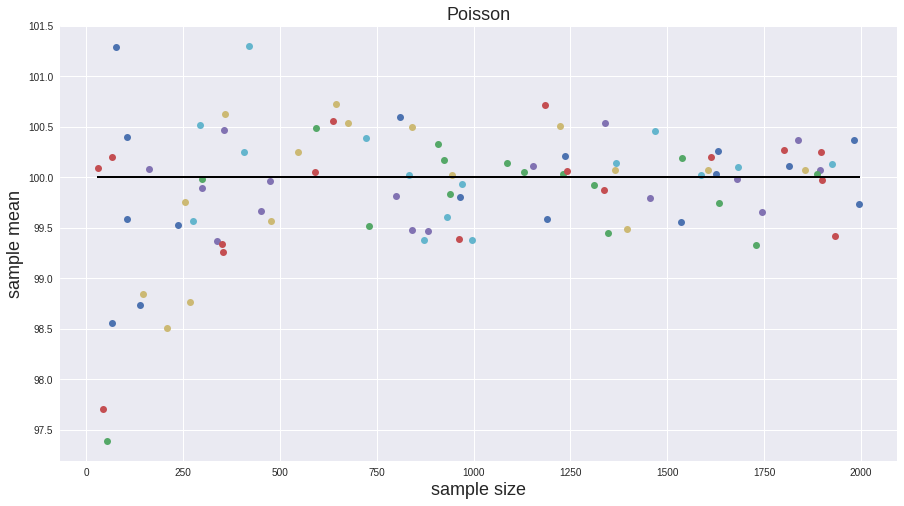

In [26]:
# poisson
lam = mymean
size = mysize
np.random.seed(98)

md['pois'] = {} 

#Filling the dictionary
for n in mysize:
    md['pois'][n] = np.random.poisson(lam, size = n)

#Saving the means in my dictionary
md['pois']['means'] = {}

#Plotting the Means
axPois_means = pl.figure(figsize=(15,8)).add_subplot(111)
for nn in md['pois']:
    if not type(nn) == str:
        md['pois']['means'][nn] = md['pois'][nn].mean()
        axPois_means.plot(nn, md['pois']['means'][nn], 'o')
        axPois_means.set_xlabel('sample size', fontsize=18)
        axPois_means.set_ylabel('sample mean', fontsize=18)
        axPois_means.set_title('Poisson', fontsize=18)
        axPois_means.plot([min(mysize), max(mysize)], [mymean, mymean], 'k')

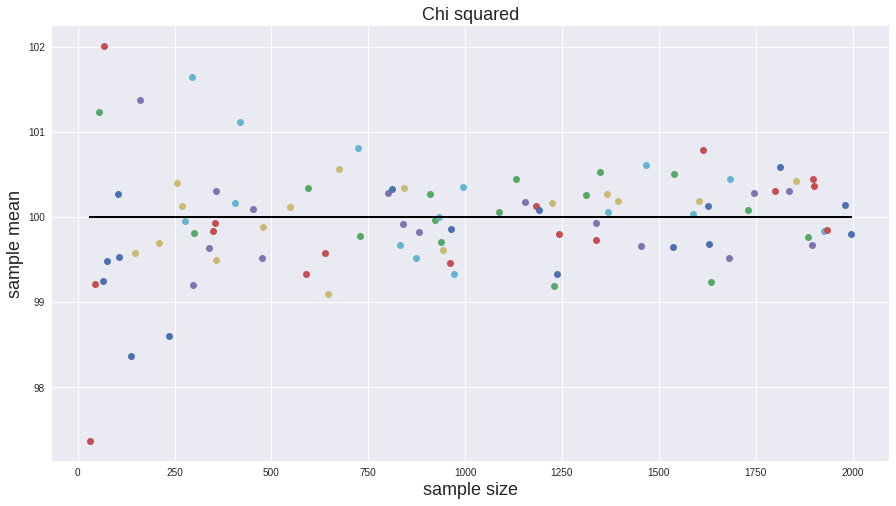

In [27]:
# chi square
np.random.seed(98)

md['chisq'] = {} 
df = mymean

#Filling the dictionary
for n in mysize:
    md['chisq'][n] = np.random.chisquare(df, size = n)

#Saving the means in my dictionary
md['chisq']['means'] = {}

#Plotting the Means
axChisq_means = pl.figure(figsize=(15,8)).add_subplot(111)
for nn in md['chisq']:
    if not type(nn) == str:
        md['chisq']['means'][nn] = md['chisq'][nn].mean()
        axChisq_means.plot(nn, md['chisq']['means'][nn], 'o')
        axChisq_means.set_xlabel('sample size', fontsize=18)
        axChisq_means.set_ylabel('sample mean', fontsize=18)
        axChisq_means.set_title('Chi squared', fontsize=18)
        axChisq_means.plot([min(mysize), max(mysize)], [mymean, mymean], 'k')

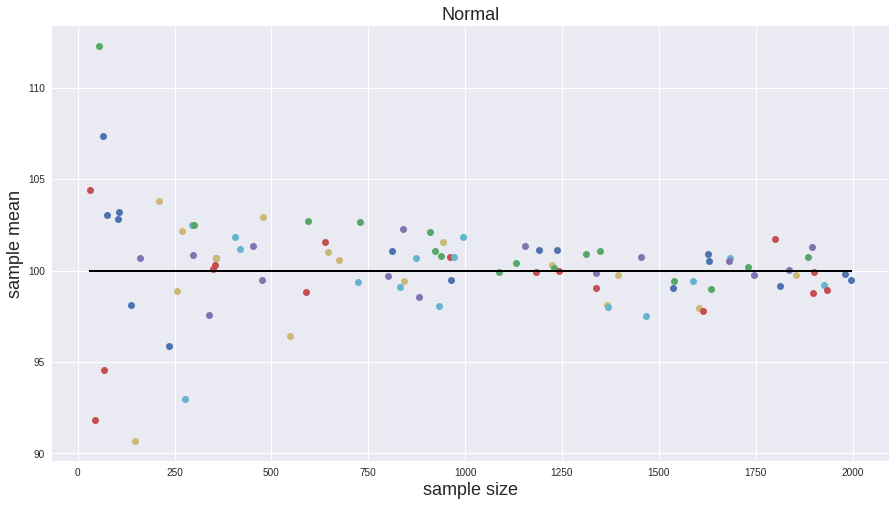

In [28]:
# gaussian
np.random.seed(98)

md['norm'] = {} 
loc = mymean
scale = mySTD

#Filling the dictionary
for n in mysize:
    md['norm'][n] = np.random.normal(loc, scale, size = n)

#Saving the means in my dictionary
md['norm']['means'] = {}

#Plotting the Means
axNorm_means = pl.figure(figsize=(15,8)).add_subplot(111)
for nn in md['norm']:
    if not type(nn) == str:
        md['norm']['means'][nn] = md['norm'][nn].mean()
        axNorm_means.plot(nn, md['norm']['means'][nn], 'o')
        axNorm_means.set_xlabel('sample size', fontsize=18)
        axNorm_means.set_ylabel('sample mean', fontsize=18)
        axNorm_means.set_title('Normal', fontsize=18)
        axNorm_means.plot([min(mysize), max(mysize)], [mymean, mymean], 'k')

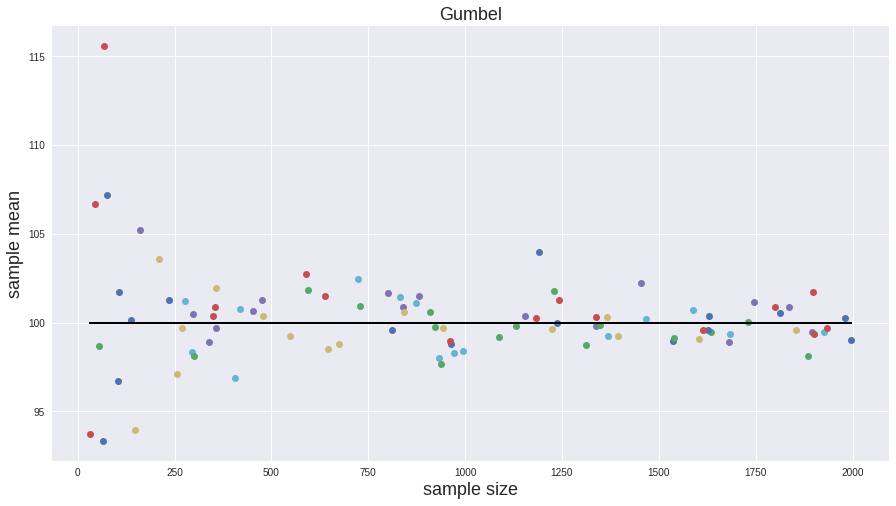

In [29]:
np.random.seed(98)
md['gumb'] = {} 
gamma = 0.5772156649015328606065120900824024310421
scale = (mySTD*sqrt(6))/np.pi
mode = mymean - ((scale)*gamma)

#Filling the dictionary
for n in mysize:
    md['gumb'][n] = np.random.gumbel(mode, scale, size = n)

#Saving the means in my dictionary
md['gumb']['means'] = {}

#Plotting the Means
axGumb_means = pl.figure(figsize=(15,8)).add_subplot(111)
for nn in md['gumb']:
    if not type(nn) == str:
        md['gumb']['means'][nn] = md['gumb'][nn].mean()
        axGumb_means.plot(nn, md['gumb']['means'][nn], 'o')
        axGumb_means.set_xlabel('sample size', fontsize=18)
        axGumb_means.set_ylabel('sample mean', fontsize=18)
        axGumb_means.set_title('Gumbel', fontsize=18)
        axGumb_means.plot([min(mysize), max(mysize)], [mymean, mymean], 'k')

In [37]:
# plotting histogram of the mean of all samples
allmeans = list(md['chisq']['means'].values() + 
                md['norm']['means'].values() + 
                md['pois']['means'].values() + 
                (md['binom']['means'].values()) + 
                md['gumb']['means'].values()
                )

pl.figure(figsize=(12, 12))
pl.hist(allmeans,bins=50)
pl.xlabel('sample mean', fontsize = 15)
pl.ylabel('# of samples', fontsize = 15)
pl.title('All Means')

TypeError: unsupported operand type(s) for +: 'dict_values' and 'dict_values'